<a href="https://colab.research.google.com/github/EarlJr53/ML24/blob/main/BM_ML2024_Assignment_15_Manual_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olin ML 2024 - Assignment 15
Let's experiment with filters!

You can uploaded an image of your choice and load it below. We've provided you with a fair bit of code scaffolding below so that you can just focus on the filters and convolution functions.

Please note that there is more than one "correct" answer for these filters.

As part of your quality assessed deliverable, you will submit a figure like the one generated at the end of this end of this script (not due now, just giving you a heads up).

(488, 488)
(256, 256)


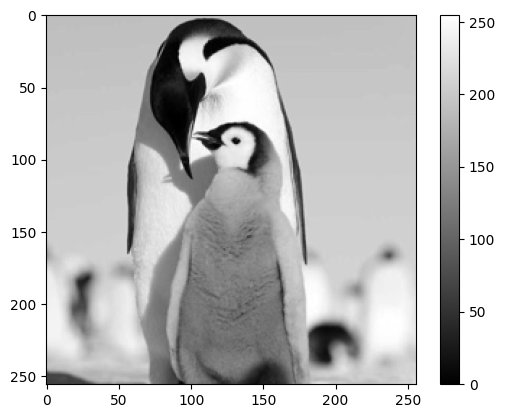

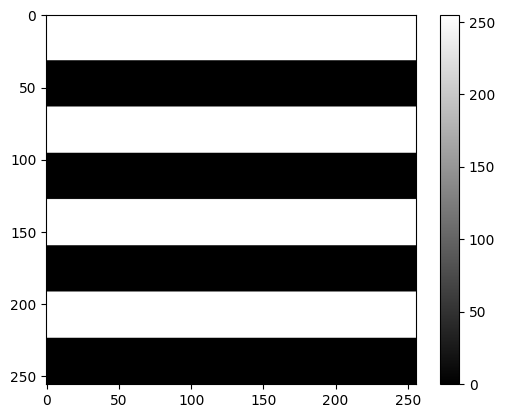

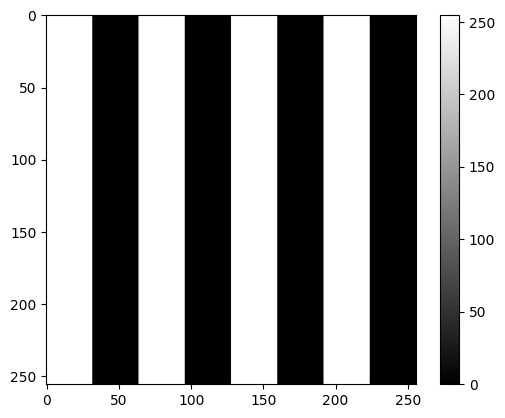

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import requests
from PIL import Image

# Set desired image size (square)
imsize = 256

# # URL of the image to download. You can put your own image here (or use the line below this instead, if you just upload your image)
image_url = "https://live.staticflickr.com/3826/11866023003_9034eac36b.jpg"  # Replace with your image URL
# Load your image
# image_fun = Image.open('lightrail.jpg')
# image_fun = image_fun.resize((imsize, imsize))
# image_fun = np.array(image_fun.convert('L'))

# # Download the image
response = requests.get(image_url)

# # Check if the request worked
if response.status_code == 200:
  # Open the image directly from the response content
  image_fun = Image.open(requests.get(image_url, stream=True).raw)
  print(image_fun.size)  # Prints the dimensions of the image (height, width, channels)
  image_fun = image_fun.resize((imsize, imsize))
  #plt.imshow(image_orig)
  image_fun = np.array(image_fun.convert('L'))
  print(image_fun.shape)
  plt.imshow(image_fun, cmap='gray')
  plt.colorbar()
  plt.show()
else:
  print(f"Failed to download image. Status code: {response.status_code}")




# Define the stripe height - Feel free to adjust this (affects the two stripe images created below)
stripe_height = 32  # Adjust for stripe width

# Create an empty numpy array for the image
image_horizontal = np.zeros((imsize, imsize), dtype=np.uint8)
# Set alternating horizonal stripes
for y in range(imsize):
    image_horizontal[y, :] = 255 if (y // stripe_height) % 2 == 0 else 0
plt.imshow(image_horizontal, cmap='gray')
plt.colorbar()
plt.show()
# Make a vertical stripe image
image_vertical = np.transpose(image_horizontal)
plt.imshow(image_vertical, cmap='gray')
plt.colorbar()
plt.show()
plt.rcParams["figure.figsize"] = (4,4)

# Add padding

**Exercise 1:** Write a function to take in an input image and return a padded version of that image as set by `padding_size`. The original image should appear in the center of the padded image. The default approach is to do zero padding, but you can choose something fancier like replicating the nearest edge value if you prefer.

We are going to make a set of 5x5 filters, so choose an appropriate padding size to preserve the image size after filtering.

You can confirm this works by making `padding size` large, which should make a box around your image.

Confirm that the size is what you expect:
(260, 260)
(256, 256)


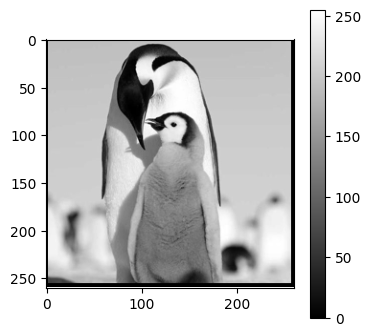

In [ ]:
#Choose padding size
padding_size = [2, 2]


def pad_image(image_in, padding_size):
  dimy = imsize + (padding_size[0] * 2)
  dimx = imsize + (padding_size[1] * 2)
  image_out = np.zeros((dimy, dimx), dtype=np.uint8)
  for y in range(imsize):
    for x in range(imsize):
      if (x >= padding_size[1]) and (x < imsize + padding_size[1]) and (y >= padding_size[0]) and (y < imsize + padding_size[0]):
        image_out[y, x] = image_in[y - padding_size[0], x - padding_size[1]]
      else:
        image_out[y, x] = 0
  return image_out


# Be careful if you use the same input and output name, as you will continue to grow your padding if you run this code repeatedly. It's safer to give a different output name.
image = pad_image(image_fun, padding_size)

print("Confirm that the size is what you expect:")
print(image.shape)
print(image_fun.shape)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()


# Create filters
**Exercise 2:** Create a 5x5 filter to detect horizonal lines as a numpy array called `filter_horizontal`.  You will want to think about how the values you choose here affect the size of the output values.

5


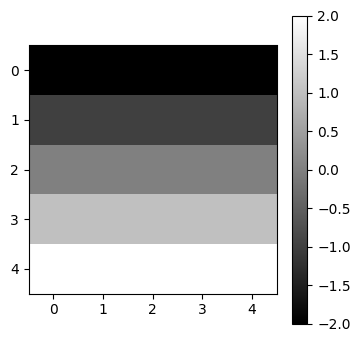

In [ ]:
filter_horizontal = np.array([
    [-2, -2, -2, -2, -2],
    [-1, -1, -1, -1, -1],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
])

# Confirm the size and show the filter
filter_size = filter_horizontal.shape[0]
print(filter_size)
plt.imshow(filter_horizontal, cmap='gray')
plt.colorbar()
plt.show()

# Filter function
**Exercise 3:** Write a function to take in `image` and `filter` and apply the filter, returning the filtered image.

In [ ]:
def apply_filter(image, filter):
  # stride = 1
  imsize = image.shape[0]
  filsize = filter.shape[0]
  outsize = imsize - filsize + 1

  image_filtered = np.zeros((outsize, outsize), dtype=np.float32)

  for y in range(imsize - filsize):
    for x in range(imsize - filsize):
      patch = image[y:y+filsize, x:x+filsize]
      image_filtered[y, x] = np.sum(patch * filter)

  return image_filtered

Check that your filter works on your image.

Then, change the code to confirm that it works for the vertical and horizontal stripe images.

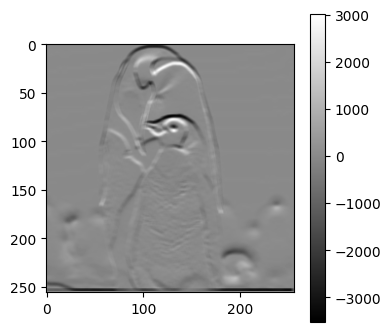

In [ ]:
image = pad_image(image_fun, padding_size)
image_filtered = apply_filter(image, filter_horizontal)
plt.imshow(image_filtered, cmap='gray')
plt.colorbar()
plt.show()


# Generate more filters
**Exercise 4:** Please write code to generate the following filters:
* A vertical edge or line filter called `filter_vertical`
* An on-center, off-surround filter called `filter_onCoffS`
* An off-center, on-surround filter `filter_offConS`
* A filter of your own choosing  `filter_mine`

You will likely need to look these filters up. Specifically investigate what the on-center, off-surround filters are based on.

You should normalize your filters in some way to avoid getting image values at the end that get really big or really negative. It is okay if your filters shift the resulting images to be have a mean closer to zero and include negative numbers.

Please note that there are

5


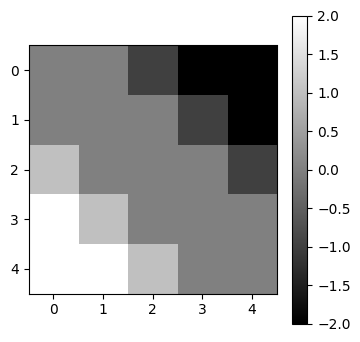

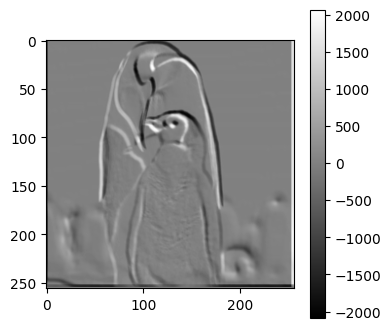

In [ ]:
# Write your filters here.
filter_vertical = np.array([
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2],
    [2, 1, 0, -1, -2]
])

filter_onCoffS = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -1, -1, 0],
    [-1, -1, 12, -1, -1],
    [0, -1, -1, -1, 0],
    [0, 0, -1, 0, 0]
])

filter_offConS = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, -12, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
])

filter_mine = np.array([
    [0, 0, -1, -2, -2],
    [0, 0, 0, -1, -2],
    [1, 0, 0, 0, -1],
    [2, 1, 0, 0, 0],
    [2, 2, 1, 0, 0]
])

# # Confirm the size and show the filter
filter_size = filter_vertical.shape[0]
print(filter_size)
plt.imshow(filter_mine, cmap='gray')
plt.colorbar()
plt.show()



# You can check any of your filters here on your images by changing the variables below
image = pad_image(image_fun, padding_size) #change image
image_filtered = apply_filter(image, filter_mine) # change filter
plt.imshow(image_filtered, cmap='gray')
plt.colorbar()
plt.show()

# Plot filters and filtered images
Here's some code to make a figure with subplot to show each of your filters and filtered images.

**Exercise 4 (part 2)**
Be prepared to share this image in class and discuss your filters.  We suggest that you save a copy of this image somewhere (you can just right click on it and click Save As).

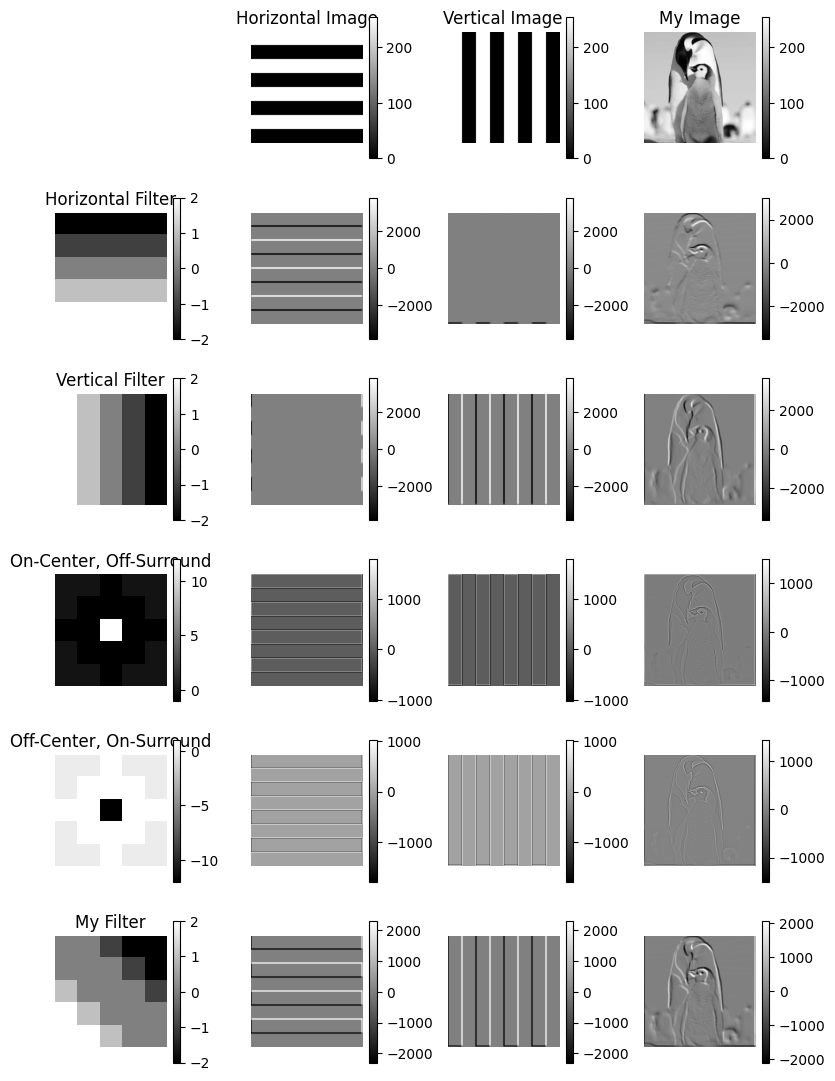

In [ ]:
image_dict = {"Horizontal Image":image_horizontal, "Vertical Image":image_vertical, "My Image":image_fun}
filter_dict = {"Horizontal Filter":filter_horizontal, "Vertical Filter":filter_vertical, "On-Center, Off-Surround":filter_onCoffS, "Off-Center, On-Surround":filter_offConS,"My Filter":filter_mine}


fig, axs = plt.subplots(len(filter_dict) + 1, len(image_dict) + 1, figsize=(8, 11))
axs[0, 0].axis('off')
for image_name, image in image_dict.items():
  image_index = 1+ list(image_dict.keys()).index(image_name)
  image = axs[0, image_index].imshow(image, cmap='gray')
  axs[0, image_index].set_title(image_name)
  axs[0, image_index].axis('off')  # Hide axis ticks
  plt.colorbar(image, ax=axs[0, image_index], orientation='vertical')

for filter_name, filter in filter_dict.items():
    filter_index = list(filter_dict.keys()).index(filter_name) + 1

    # Display the filter and add colorbarf
    img = axs[filter_index, 0].imshow(filter, cmap='gray')
    axs[filter_index, 0].axis('off')  # Hide axis ticks
    axs[filter_index, 0].set_title(filter_name)
    plt.colorbar(img, ax=axs[filter_index, 0], orientation='vertical')

    for image_name, image in image_dict.items():
        image_index = list(image_dict.keys()).index(image_name) + 1

        # Pad and filter the image
        image_pad = pad_image(image, padding_size)
        image_filtered = apply_filter(image_pad, filter)

        # Display the filtered image and add colorbar
        img_filtered = axs[filter_index, image_index].imshow(image_filtered, cmap='gray')
        axs[filter_index, image_index].axis('off')  # Hide axis ticks
        plt.colorbar(img_filtered, ax=axs[filter_index, image_index], orientation='vertical')

plt.tight_layout()
plt.show()



**Exercise 5:** Convert one of your filters into a torch tensor and apply the same convolution using a pytorch function. You will need to look up how to do a convolutional layer in pytorch and then put in the proper variables. Don't worry about padding here.

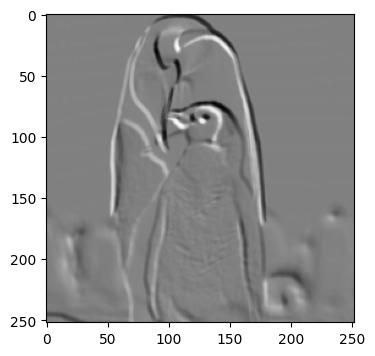

In [ ]:
import torch
import torch.nn.functional as F

image = torch.tensor(image_fun, dtype=torch.float32).unsqueeze(0)
#Write code here. You'll need to convert your filter (sometimes called a kernel) and apply the convolution

weights = torch.tensor(filter_mine, dtype=torch.float32)
weights = weights.view(1, 1, 5, 5)

out = F.conv2d(image, weights)

# Name your filtered image "out", or change the code below

plt.imshow(out.detach().numpy().squeeze(), cmap='gray')
plt.show()

Yay, you're finished! Make sure to write down any questions in the assignment submission and to be prepared to share your results in class.